# Preprocessing
Let's check out the data and handle missing values etc.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os 

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), ".."))) # adds folder to Python path

Let's load the data

In [ ]:

from src.data.load_data import load_data

claims_raw, _ = load_data(raw=True) # returns train and test dataframes
claims_raw.head()


,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,2122523.0,0,0.43,D,7,18,36,95,B1,Regular,1054,R24
1,3173420.0,0,0.10,D,7,17,80,95,B2,Regular,598,R25
2,1188619.0,0,0.33,E,7,3,36,76,B6,Regular,4172,R82
3,31400.0,0,0.56,A,5,4,73,52,B13,Diesel,15,R24
4,3138755.0,0,0.27,E,8,0,37,50,B11,Diesel,3021,R53


Quick description

In [3]:
claims_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542410 entries, 0 to 542409
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IDpol       542410 non-null  float64
 1   ClaimNb     542410 non-null  int64  
 2   Exposure    542410 non-null  float64
 3   Area        542410 non-null  object 
 4   VehPower    542410 non-null  int64  
 5   VehAge      542410 non-null  int64  
 6   DrivAge     542410 non-null  int64  
 7   BonusMalus  542410 non-null  int64  
 8   VehBrand    542410 non-null  object 
 9   VehGas      542410 non-null  object 
 10  Density     542410 non-null  int64  
 11  Region      542410 non-null  object 
dtypes: float64(2), int64(6), object(4)
memory usage: 49.7+ MB


Some objects that will need to be fixed, IDpol float? why?

In [4]:
print(((claims_raw['IDpol'] % 1) != 0).any())
claims_raw['IDpol'] = claims_raw['IDpol'].astype('int64').astype(str)

False


It should be a string, as it's just an identifier

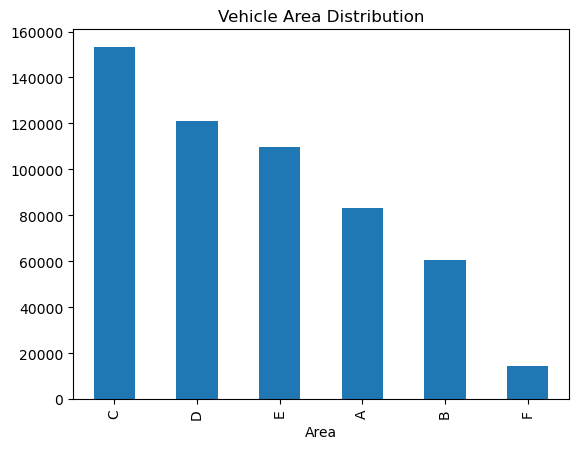

In [5]:
claims_raw["Area"].value_counts().plot(kind='bar')
plt.title("Vehicle Area Distribution");

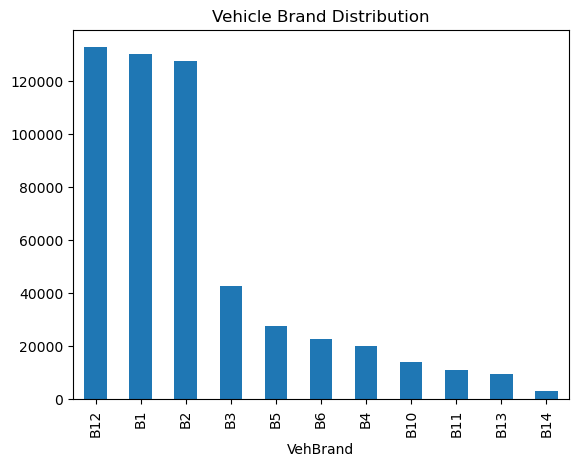

In [6]:
claims_raw["VehBrand"].value_counts().plot(kind='bar')
plt.title("Vehicle Brand Distribution");

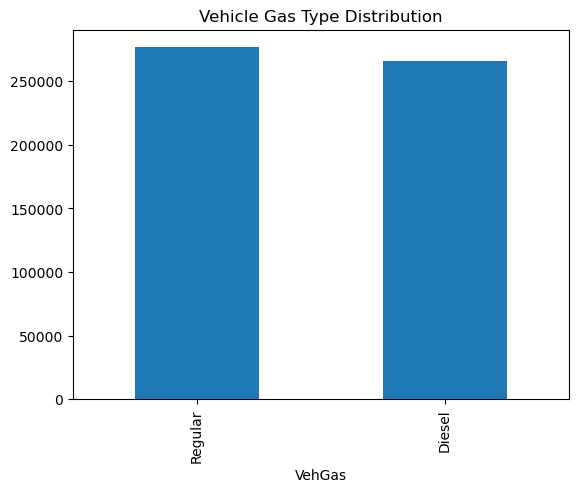

In [7]:
claims_raw["VehGas"].value_counts().plot(kind='bar')
plt.title("Vehicle Gas Type Distribution");

Text(0.5, 1.0, 'Vehicle Region Distribution')

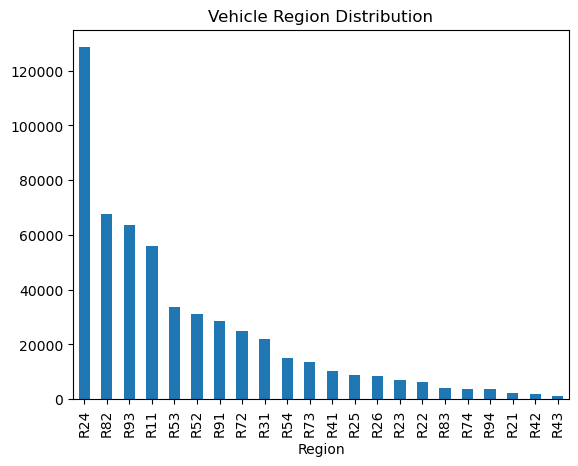

In [8]:
claims_raw["Region"].value_counts().plot(kind='bar')
plt.title("Vehicle Region Distribution")

In [9]:
claims_raw.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
IDpol,542410,542410,2122523,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ClaimNb,542410.0,NaN,NaN,NaN,0.053122,0.238785,0.0,0.0,0.0,0.0,11.0
Exposure,542410.0,NaN,NaN,NaN,0.52884,0.364463,0.002732,0.18,0.49,0.99,2.01
Area,542410,6,C,153287,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VehPower,542410.0,NaN,NaN,NaN,6.453281,2.050506,4.0,5.0,6.0,7.0,15.0
VehAge,542410.0,NaN,NaN,NaN,7.045768,5.660827,0.0,2.0,6.0,11.0,100.0
DrivAge,542410.0,NaN,NaN,NaN,45.503164,14.135435,18.0,34.0,44.0,55.0,100.0
BonusMalus,542410.0,NaN,NaN,NaN,59.761546,15.639321,50.0,50.0,50.0,64.0,230.0
VehBrand,542410,11,B12,132831,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VehGas,542410,2,Regular,276723,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
claims_raw.isnull().sum()

IDpol         0
ClaimNb       0
Exposure      0
Area          0
VehPower      0
VehAge        0
DrivAge       0
BonusMalus    0
VehBrand      0
VehGas        0
Density       0
Region        0
dtype: int64

KeyboardInterrupt: 

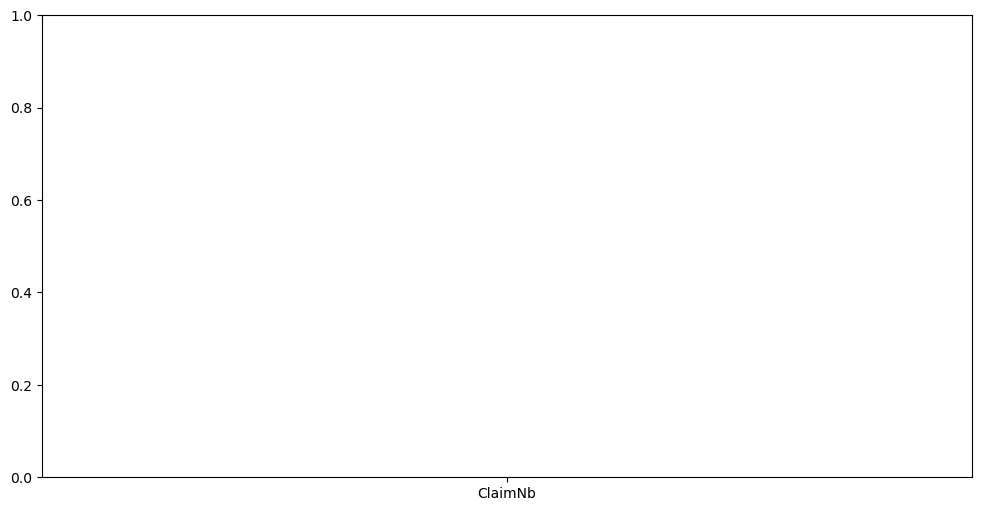

In [11]:
# Plot for checking outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=claims_raw.select_dtypes(include=[np.number]))
plt.title("Boxplot for Numerical Features")
plt.xticks(rotation=45)
plt.show()

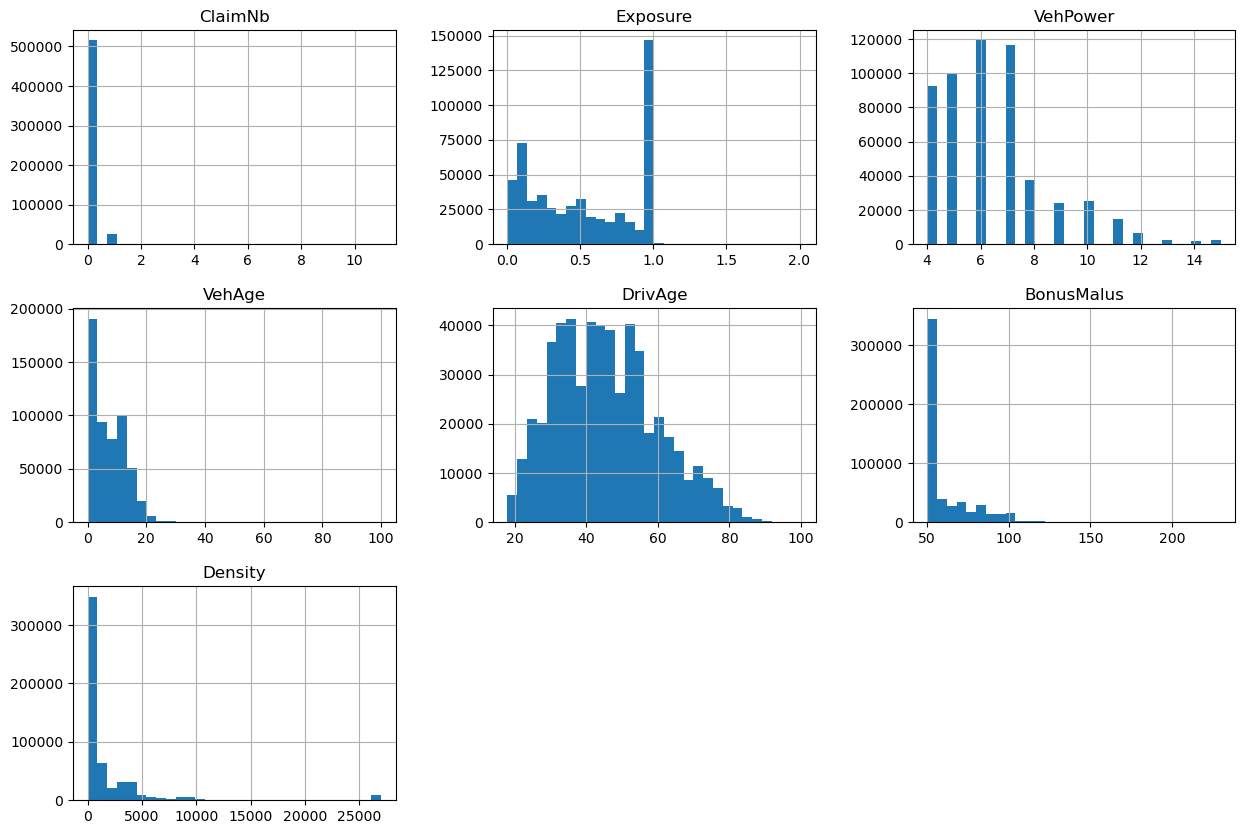

In [ ]:
claims_raw.hist(bins=30, figsize=(15, 10))
plt.show()

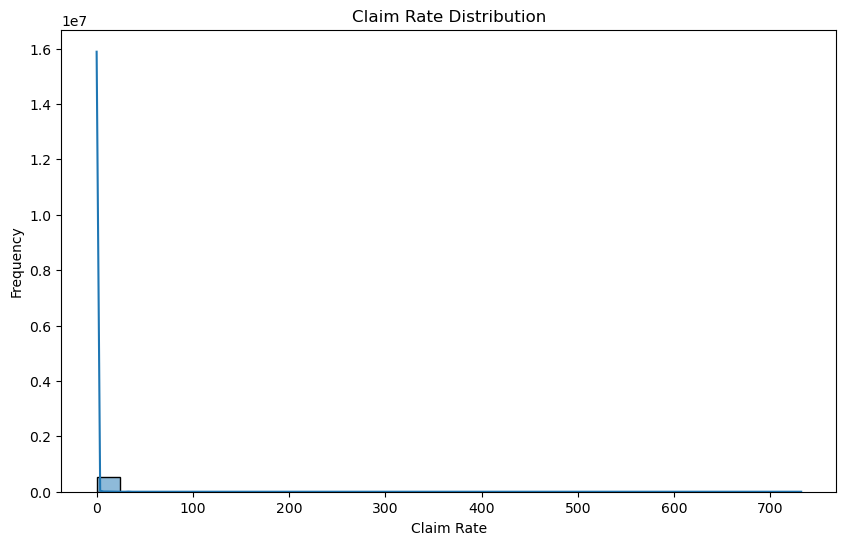

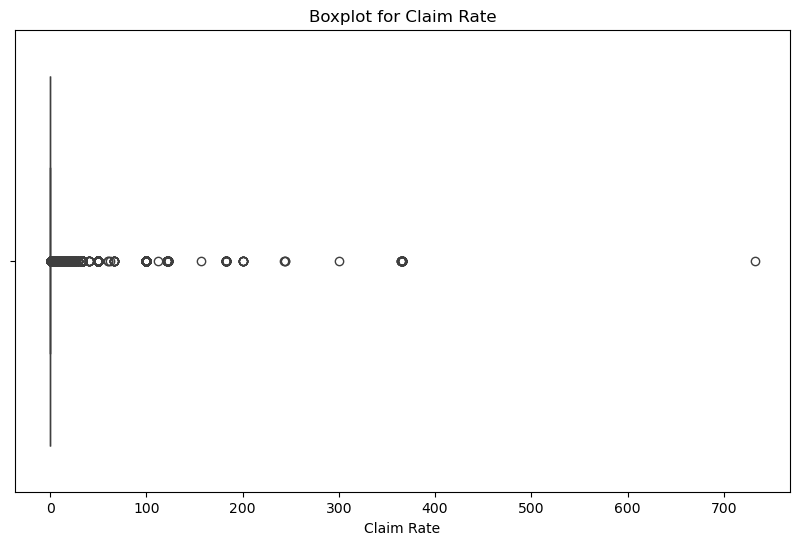

In [ ]:
# new column for rate from claimnb and exposure and plot it
claims_raw['claim_rate'] = claims_raw['ClaimNb'] / claims_raw['Exposure']
plt.figure(figsize=(10, 6))
sns.histplot(claims_raw['claim_rate'], bins=30, kde=True)
plt.title("Claim Rate Distribution")
plt.xlabel("Claim Rate")
plt.ylabel("Frequency")
plt.show()

# check for outliaers in claim_rate
plt.figure(figsize=(10, 6))
sns.boxplot(x=claims_raw['claim_rate'])
plt.title("Boxplot for Claim Rate")
plt.xlabel("Claim Rate")
plt.show()

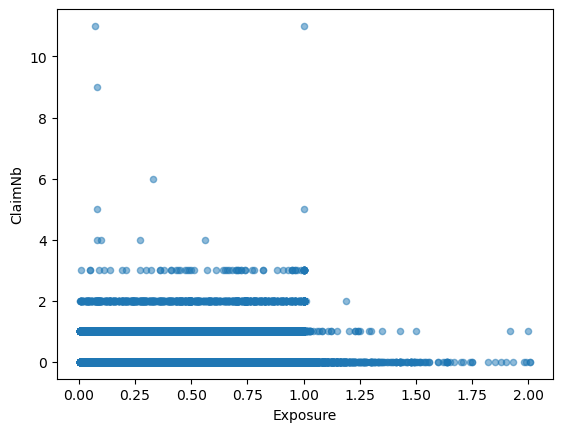

In [ ]:
claims_raw.plot(kind='scatter', x='Exposure', y='ClaimNb', alpha=0.5);

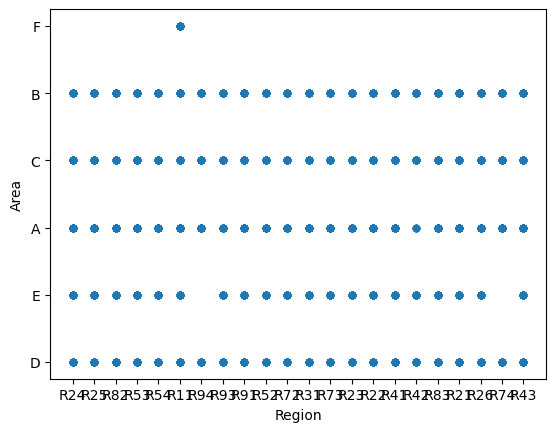

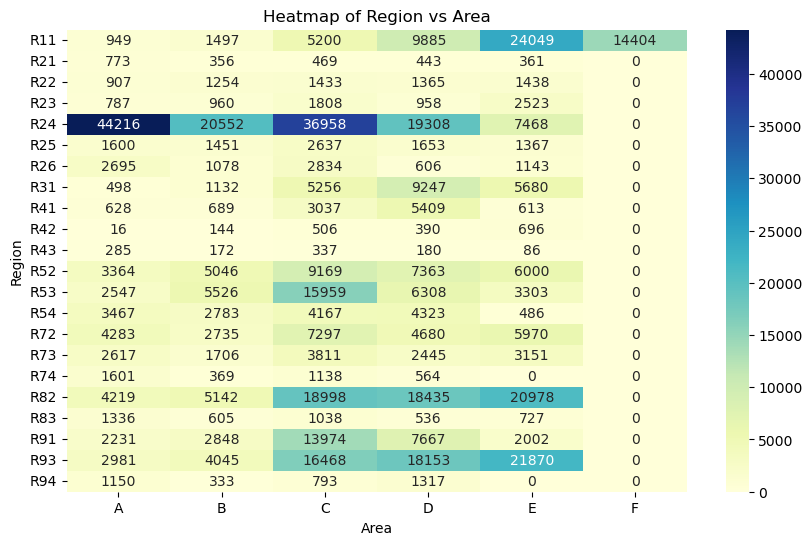

In [ ]:
claims_raw.plot(kind='scatter', x='Region', y='Area', alpha=0.5);
# heatmap from the above scatter plot
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(claims_raw['Region'], claims_raw['Area'] ), cmap="YlGnBu", annot=True, fmt='d')
plt.title("Heatmap of Region vs Area")
plt.xlabel("Area")
plt.ylabel("Region")
plt.show()

In [ ]:
# variation mean relation of the distribution of claimnb
mean_claims = claims_raw['ClaimNb'].mean()
var_claims = claims_raw['ClaimNb'].var()
print(f"Mean of ClaimNb: {mean_claims}")
print(f"Variance of ClaimNb: {var_claims}")
print(f"Variance to Mean Ratio: {var_claims / mean_claims}")

Mean of ClaimNb: 0.05312217695101491
Variance of ClaimNb: 0.057018481613523936
Variance to Mean Ratio: 1.0733461030051892


<Figure size 1200x800 with 0 Axes>

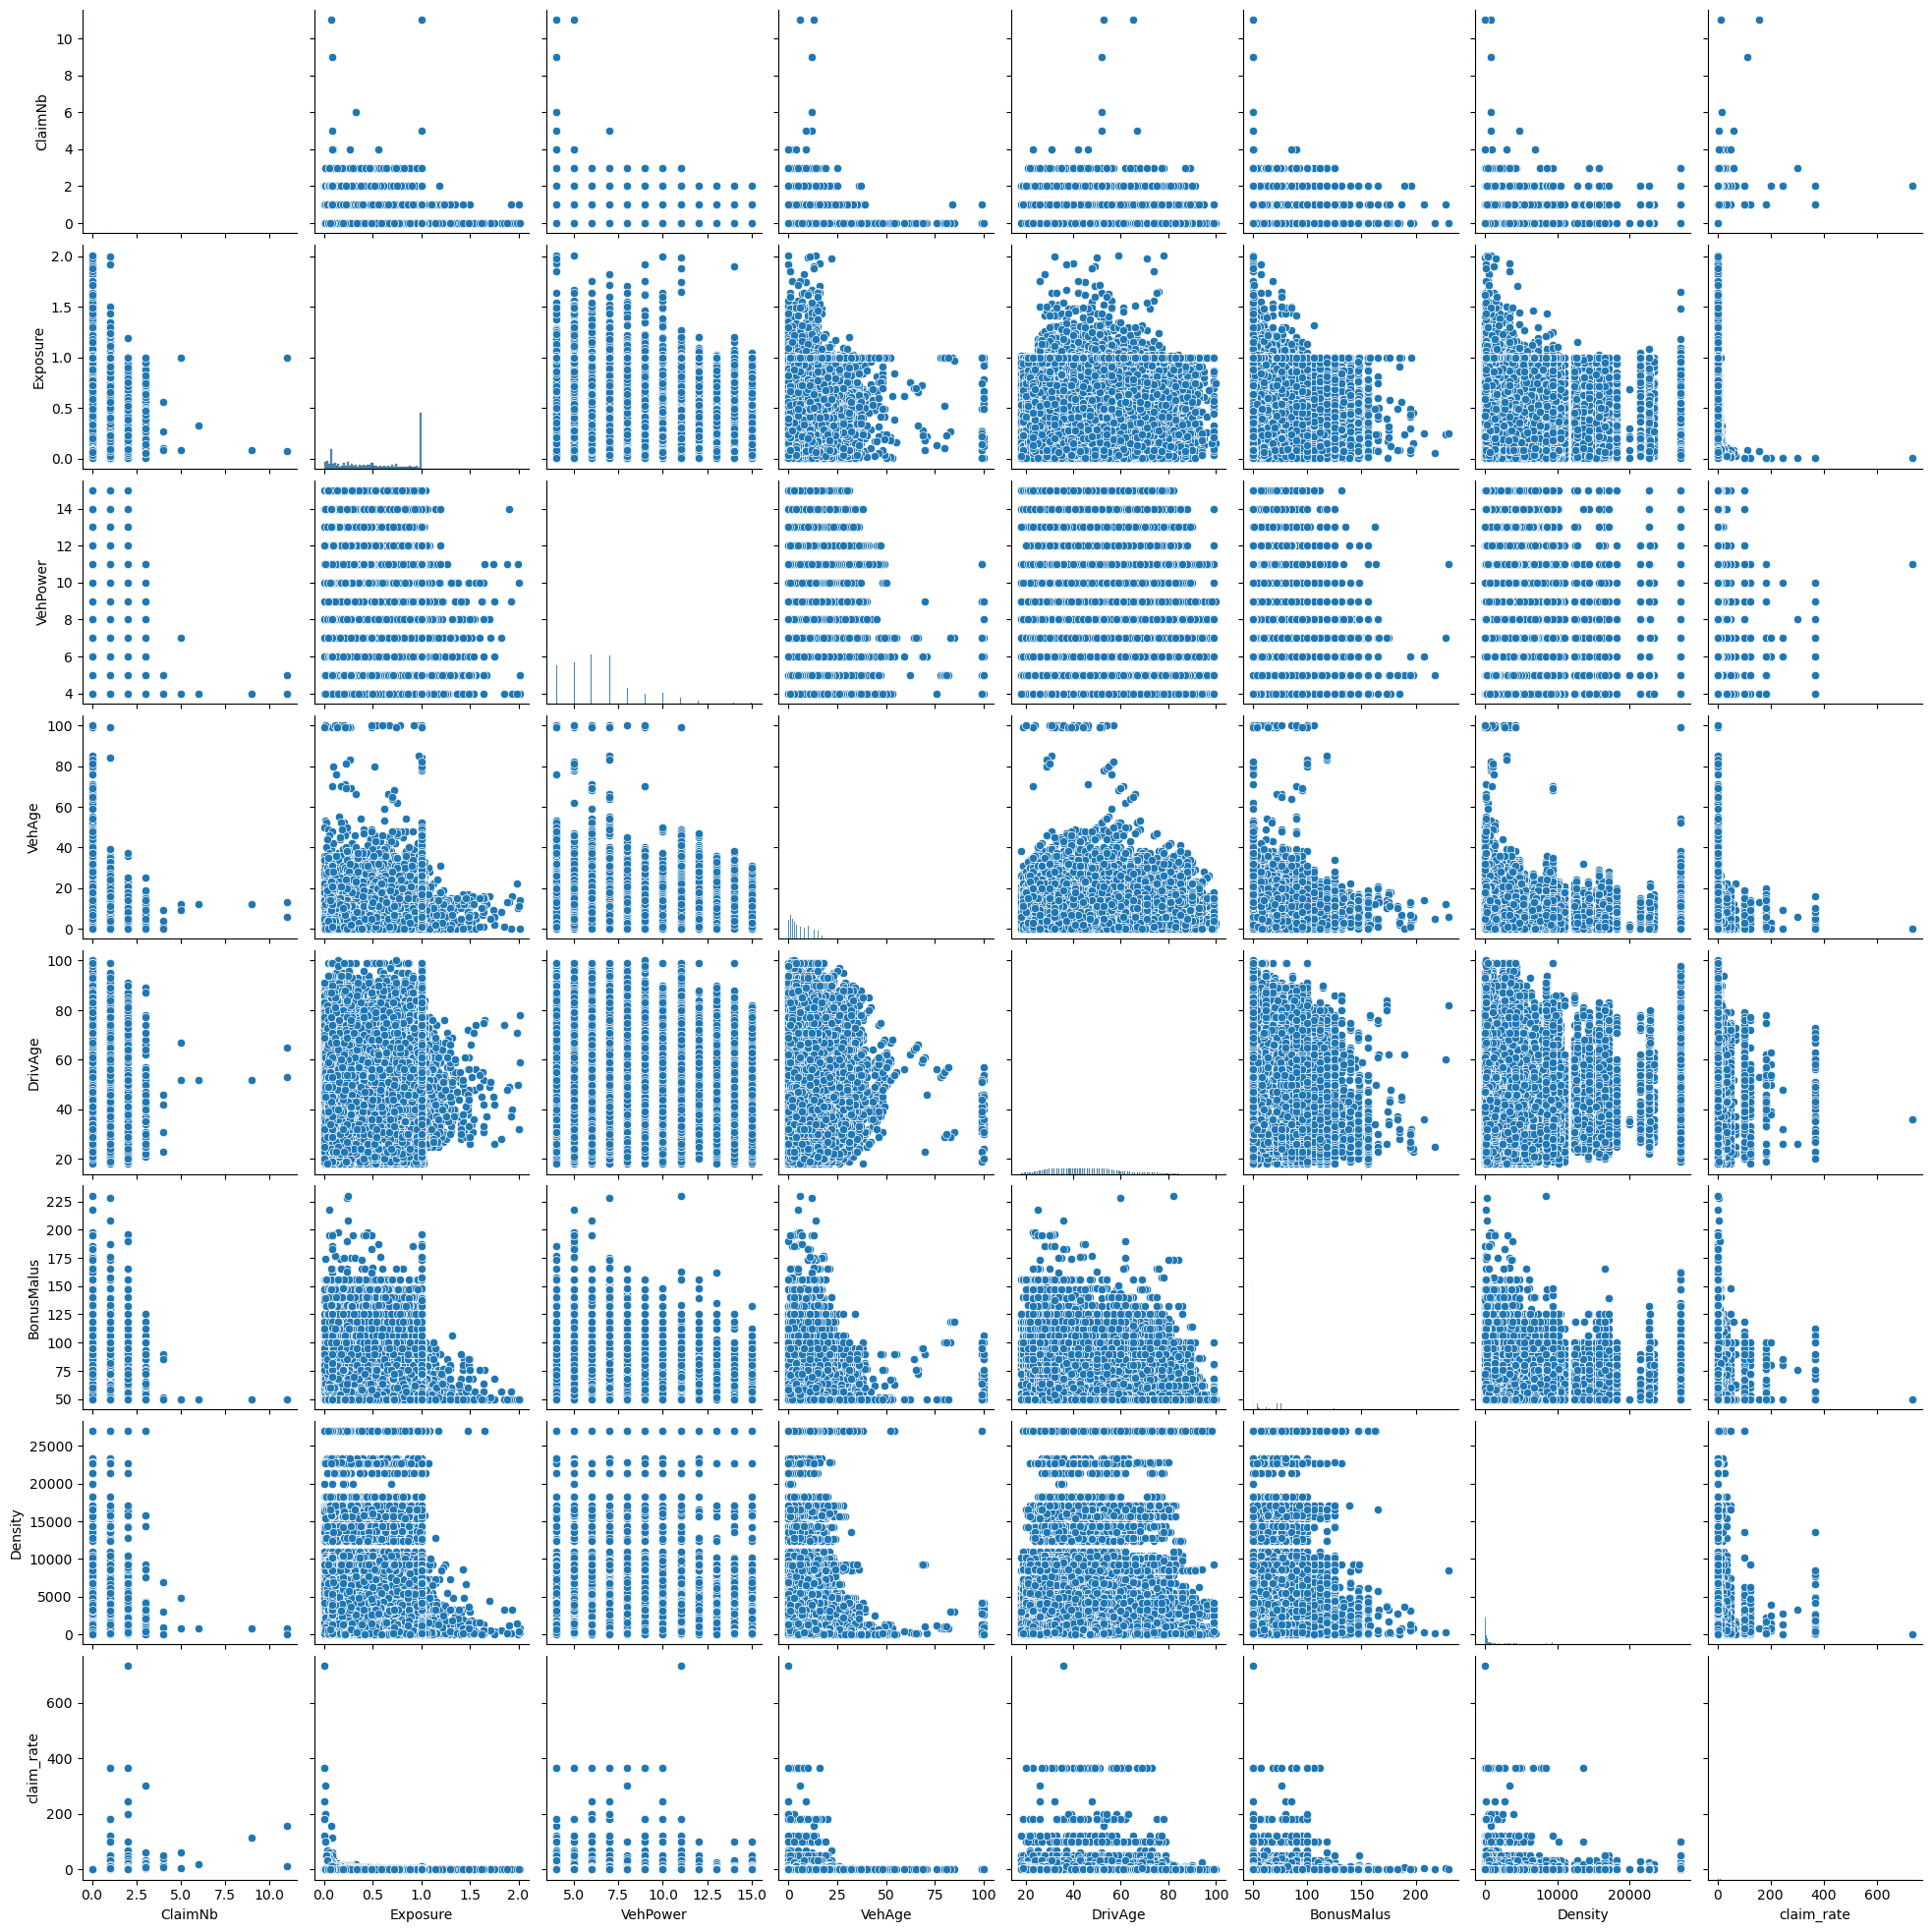

In [ ]:
# sns pairplot for every feature only numerical
plt.figure(figsize=(12, 8))
sns.pairplot(claims_raw.select_dtypes(include=[np.number]))
plt.show()

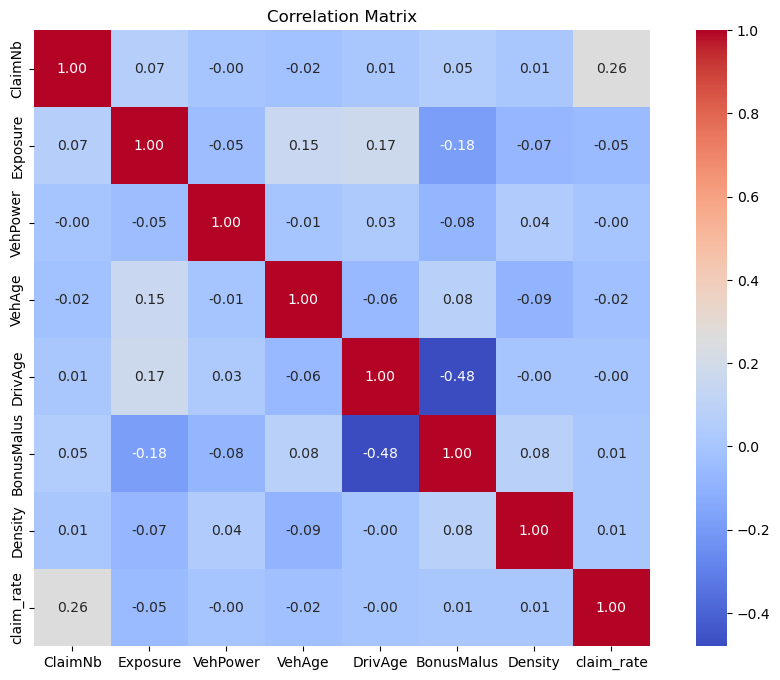

In [ ]:
corrmatrix = claims_raw.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corrmatrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

C:\Users\etiko\AppData\Local\Temp\ipykernel_17264\593250946.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate_stats = claims_raw.groupby('rate_bin')['ClaimNb'].agg(['mean', 'var'])


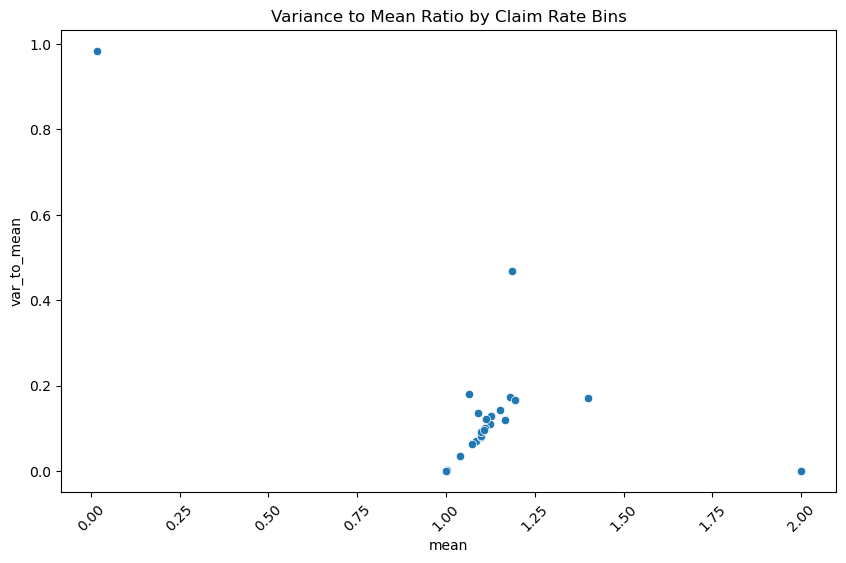

In [ ]:
# mean variance relation for rate for 1000 unique bins for a scatter plot
claims_raw['rate_bin'] = pd.qcut(claims_raw['claim_rate'], q=1000, duplicates='drop')
rate_stats = claims_raw.groupby('rate_bin')['ClaimNb'].agg(['mean', 'var'])
rate_stats['var_to_mean'] = rate_stats['var'] / rate_stats['mean']
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rate_stats['mean'], y=rate_stats['var_to_mean'])
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.title("Variance to Mean Ratio by Claim Rate Bins")
plt.show()
# zero inflation poisson distribution check

## EDA Enhancements

This section adds exposure-aware exploratory analysis for claims frequency,
data quality checks, target-aware plots, correlation diagnostics, and a quick baseline.


In [ ]:

# Utilities for EDA additions
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
sns.set_context('talk'); sns.set_style('whitegrid')
pd.set_option('display.max_columns', 100)

df = claims_raw.copy()
# Expect a DataFrame named df with columns: ClaimNb, Exposure, Area, VehPower, VehAge, DrivAge, BonusMalus, VehBrand, VehGas, Density, Region
assert 'df' in globals(), 'Please ensure your dataset is loaded into a DataFrame named `df` before running these cells.'


AssertionError: Please ensure your dataset is loaded into a DataFrame named `df` before running these cells.

### Target and Transforms

In [ ]:

        # Filter invalid exposure and create target/feature transforms
        df = df.copy()
        df = df[df['Exposure'] > 0].reset_index(drop=True)
        df['claim_rate'] = df['ClaimNb'] / df['Exposure']
        df['log_density'] = np.log1p(df['Density']) if 'Density' in df.columns else np.nan
        print(df[['ClaimNb','Exposure']].describe())
        print('Claim rate mean:', df['claim_rate'].mean())
        

### Data Quality Checks

In [ ]:

        issues = {}
        # Duplicates by policy ID if available
        if 'IDpol' in df.columns:
            dup = df.duplicated(subset=['IDpol']).sum()
            issues['duplicate_IDpol'] = int(dup)
        # Impossible values
        issues['DrivAge_lt_18'] = int((df['DrivAge'] < 18).sum()) if 'DrivAge' in df.columns else None
        issues['VehAge_lt_0'] = int((df['VehAge'] < 0).sum()) if 'VehAge' in df.columns else None
        issues['Exposure_le_0'] = int((df['Exposure'] <= 0).sum())
        # Near-zero variance (categoricals/numerics)
        nzv = {}
        for c in df.columns:
            vc = df[c].value_counts(dropna=False)
            if len(vc) > 0 and (vc.iloc[0] / max(len(df), 1) > 0.98):
                nzv[c] = float(vc.iloc[0] / len(df))
        print('Issues summary:', issues)
        print('Near-zero variance features (top freq share):', nzv)
        

### Missingness Overview

In [ ]:

        missing_pct = df.isna().mean().sort_values(ascending=False)
        display(missing_pct.to_frame('missing_pct').style.format({'missing_pct': '{:.1%}'}))
        # Correlation of missingness with claim_rate
        corrs = {}
        for c in df.columns:
            if df[c].isna().any():
                m = df[c].isna().astype(float)
                cor = np.corrcoef(m, df['claim_rate'])[0,1] if df['claim_rate'].std() > 0 else np.nan
                corrs[c] = cor
        print('Missingness correlation with claim_rate (abs sorted):')
        for k,v in sorted(corrs.items(), key=lambda kv: (0 if kv[1] is None else -abs(kv[1] or 0))):
            print(f"{k}: {v:.3f}")
        

### Univariate Distributions

In [ ]:

        num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
        cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

        # Numeric histograms
        for c in num_cols:
            if c in ['ClaimNb', 'Exposure', 'claim_rate']:
                pass
            plt.figure(figsize=(6,4))
            sns.histplot(data=df, x=c, kde=False)
            plt.title(f'Distribution of {c}')
            plt.tight_layout(); plt.show()

        # Categorical counts (top-k)
        for c in cat_cols:
            plt.figure(figsize=(7,4))
            vc = df[c].value_counts().head(15)
            sns.barplot(x=vc.values, y=vc.index, orient='h')
            plt.title(f'Counts of {c} (top 15)')
            plt.tight_layout(); plt.show()
        

### Categorical Cardinality and Rare Levels

In [ ]:

        num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
        cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
        for c in cat_cols:
            counts = df[c].value_counts(dropna=False)
            rare = counts[counts < max(50, 0.01 * len(df))]
            print(f"{c}: {len(counts)} levels; rare (<1% or <50): {len(rare)}")
        

### Exposure-Weighted Claim Rates by Category

In [ ]:

        cat_to_plot = [c for c in ['Area','VehGas','VehBrand','Region'] if c in df.columns]
        for c in cat_to_plot:
            grp = df.groupby(c).agg(Claims=('ClaimNb','sum'), Exp=('Exposure','sum'), n=('ClaimNb','size')).reset_index()
            grp['rate'] = grp['Claims'] / grp['Exp']
            grp = grp.sort_values('rate', ascending=False)
            plt.figure(figsize=(8, max(3, 0.3*len(grp))))
            sns.barplot(data=grp, x='rate', y=c)
            plt.title(f'Exposure-weighted claim rate by {c}')
            plt.tight_layout(); plt.show()
        

### Numeric Relationships vs claim_rate (Exposure-Weighted Binning)

In [ ]:

        def binned_rate(x, y_claims, y_exp, bins=12):
            q = np.linspace(0, 1, bins+1)
            edges = np.unique(np.quantile(x, q))
            idx = np.clip(np.searchsorted(edges, x, side='right')-1, 0, len(edges)-2)
            dfb = pd.DataFrame({'bin': idx, 'x': x, 'claims': y_claims, 'exp': y_exp})
            g = dfb.groupby('bin').agg(xm=('x','mean'), claims=('claims','sum'), exp=('exp','sum')).reset_index(drop=True)
            g['rate'] = g['claims']/g['exp']
            return g

        num_for_rel = [c for c in ['DrivAge','VehAge','VehPower','Density'] if c in df.columns]
        for c in num_for_rel:
            g = binned_rate(df[c].astype(float), df['ClaimNb'], df['Exposure'])
            plt.figure(figsize=(6,4))
            sns.lineplot(data=g, x='xm', y='rate', marker='o')
            plt.title(f'Claim rate vs {c} (binned)')
            plt.xlabel(c)
            plt.tight_layout(); plt.show()
        

### Interactions

In [ ]:

        def interaction_heatmap(a, b):
            grp = df.groupby([a,b]).agg(Claims=('ClaimNb','sum'), Exp=('Exposure','sum')).reset_index()
            grp['rate'] = grp['Claims']/grp['Exp']
            pivot = grp.pivot(index=a, columns=b, values='rate')
            plt.figure(figsize=(8,6))
            sns.heatmap(pivot, cmap='viridis')
            plt.title(f'Claim rate heatmap: {a} x {b}')
            plt.tight_layout(); plt.show()

        pairs = []
        if 'Area' in df.columns and 'VehPower' in df.columns: pairs.append(('Area','VehPower'))
        if 'Area' in df.columns and 'Density' in df.columns: pairs.append(('Area','Density'))
        if 'BonusMalus' in df.columns and 'DrivAge' in df.columns: pairs.append(('BonusMalus','DrivAge'))
        for a,b in pairs:
            # Bin numeric second variable if needed
            if str(df[b].dtype) != 'object' and df[b].nunique() > 15:
                df['_tmp_bin'] = pd.qcut(df[b], q=min(10, df[b].nunique()), duplicates='drop')
                interaction_heatmap(a, '_tmp_bin')
                df.drop(columns=['_tmp_bin'], inplace=True)
            else:
                interaction_heatmap(a, b)
        

### Correlation and Association

In [ ]:

        # Spearman correlations among numeric columns
        num_cols2 = [c for c in df.select_dtypes(include=[np.number]).columns if c not in ['ClaimNb','Exposure']]
        if len(num_cols2) > 1:
            corr = df[num_cols2].corr(method='spearman')
            display(corr)
            plt.figure(figsize=(6,5))
            sns.heatmap(corr, vmin=-1, vmax=1, cmap='coolwarm', annot=False)
            plt.title('Spearman Correlation (numeric)')
            plt.tight_layout(); plt.show()

        # Cramer's V for selected categoricals
        def cramers_v(x, y):
            tab = pd.crosstab(x, y)
            n = tab.values.sum()
            row_sums = tab.sum(axis=1).values.reshape(-1,1)
            col_sums = tab.sum(axis=0).values.reshape(1,-1)
            expected = row_sums @ col_sums / n
            chi2 = ((tab.values - expected)**2 / np.where(expected==0, 1, expected)).sum()
            phi2 = chi2 / n
            r, k = tab.shape
            return sqrt(phi2 / max(1, min(r-1, k-1)))

        cat_for_assoc = [c for c in ['Area','VehBrand','VehGas','Region'] if c in df.columns]
        for i in range(len(cat_for_assoc)):
            for j in range(i+1, len(cat_for_assoc)):
                a,b = cat_for_assoc[i], cat_for_assoc[j]
                try:
                    v = cramers_v(df[a], df[b])
                    print(f"Cramers V {a}-{b}: {v:.3f}")
                except Exception as e:
                    print(f'CramersV failed for {a},{b}:', e)
        

### Insurance-Specific Checks

In [ ]:

        zero_share = (df['ClaimNb'] == 0).mean()
        pos = df.loc[df['ClaimNb']>0, 'ClaimNb']
        print(f'Zero-claim share: {zero_share:.2%}; positive ClaimNb mean {pos.mean():.3f}, var {pos.var():.3f}')
        mu = df['ClaimNb'].mean(); var = df['ClaimNb'].var()
        print(f'Overall ClaimNb mean {mu:.4f}, var {var:.4f}, var/mean {var/mu if mu>0 else np.nan:.2f}')
        # Monotonicity checks via Spearman between binned feature and rate
        for c in [k for k in ['BonusMalus','DrivAge'] if k in df.columns]:
            g = df.groupby(pd.qcut(df[c], q=min(10, df[c].nunique()), duplicates='drop'))                 .agg(rate=('claim_rate','mean')).reset_index()
            g['x'] = range(len(g))
            rho = g[['x','rate']].corr(method='spearman').iloc[0,1]
            print(f'Monotonicity (Spearman) of {c} vs rate (by bins): {rho:.3f}')
        

### Spatial Overview (Region)

In [ ]:

        if 'Region' in df.columns:
            grp = df.groupby('Region').agg(Claims=('ClaimNb','sum'), Exp=('Exposure','sum')).reset_index()
            grp['rate'] = grp['Claims']/grp['Exp']
            grp = grp.sort_values('rate', ascending=False)
            plt.figure(figsize=(8, max(3, 0.25*len(grp))))
            sns.barplot(data=grp, x='rate', y='Region')
            plt.title('Claim rate by Region')
            plt.tight_layout(); plt.show()
        else:
            print('Region column not found; skipping spatial overview.')
        

### Leakage & Train/Test Splits

In [ ]:

        # Train/Test split by IDpol if available to avoid leakage across policies
        from sklearn.model_selection import train_test_split
        if 'IDpol' in df.columns:
            uniq = df['IDpol'].dropna().unique()
            train_ids, test_ids = train_test_split(uniq, test_size=0.2, random_state=42)
            trn = df[df['IDpol'].isin(train_ids)].copy()
            tst = df[df['IDpol'].isin(test_ids)].copy()
            print('Split sizes (rows):', len(trn), len(tst))
        else:
            trn, tst = train_test_split(df, test_size=0.2, random_state=42)
            print('Row-wise split used; consider grouping by policy if possible.')
        

### Outliers & Winsorization Candidates

In [ ]:

        def pct_cap(s, lo=0.01, hi=0.99):
            return s.quantile(lo), s.quantile(hi)
        for c in [x for x in ['BonusMalus','Density','VehPower','VehAge'] if x in df.columns]:
            lo, hi = pct_cap(df[c].astype(float))
            print(f'{c}: suggested caps [{lo:.2f}, {hi:.2f}]')
        

### Baseline Frequency Model (Poisson GLM with offset)

In [ ]:

        features = []
        features += [c for c in ['DrivAge','VehAge','VehPower','log_density'] if c in df.columns]
        features += [c for c in ['Area','VehGas','Region'] if c in df.columns]
        print('Features considered:', features)

        # One-hot encode categoricals minimally
        X = pd.get_dummies(df[features], drop_first=True) if features else pd.DataFrame(index=df.index)
        y = df['ClaimNb'].values
        offset = np.log(df['Exposure'].values)

        try:
            import statsmodels.api as sm
            model = sm.GLM(y, sm.add_constant(X, has_constant='add'), family=sm.families.Poisson(), offset=offset)
            res = model.fit()
            print(res.summary())
            mu_hat = res.predict(sm.add_constant(X, has_constant='add'), offset=offset)
            dev = res.deviance; null_dev = res.null_deviance
            print(f'Deviance: {dev:.2f}, Null deviance: {null_dev:.2f}')
        except Exception as e:
            print('statsmodels not available or failed:', e)
            try:
                from sklearn.linear_model import PoissonRegressor
                m = PoissonRegressor(alpha=1e-6, fit_intercept=True, max_iter=1000)
                m.fit(X, y, sample_weight=None)
                mu_hat = np.exp(m.intercept_ + X.values @ m.coef_) * 1.0
                print('Sklearn PoissonRegressor fitted. Mean pred:', mu_hat.mean())
            except Exception as e2:
                print('Could not fit baseline Poisson model:', e2)
        

### Notes and Next Steps

- Review rare level grouping and decide thresholds.

- Consider capping/winsorization for skewed numeric features.

- Validate monotonic trends for tariff variables (e.g., BonusMalus).

- Use `log(Exposure)` as offset in all frequency models.
